컬럼 목록: ['idx', 'persona', 'experiencer', 'system_prompt', 'user_input', 'response', 'model']
데이터 크기: (96800, 7)
모델별 점수 통계:
                   count       mean        std  min   25%   50%   75%    max
model                                                                       
EXAONE-3.5-7.8B  48400.0  69.656777  20.754500  0.0  65.0  75.0  85.0  100.0
LLaMA-3.1-8B     48370.0  60.765619  29.862215  0.0  20.0  80.0  80.0  100.0


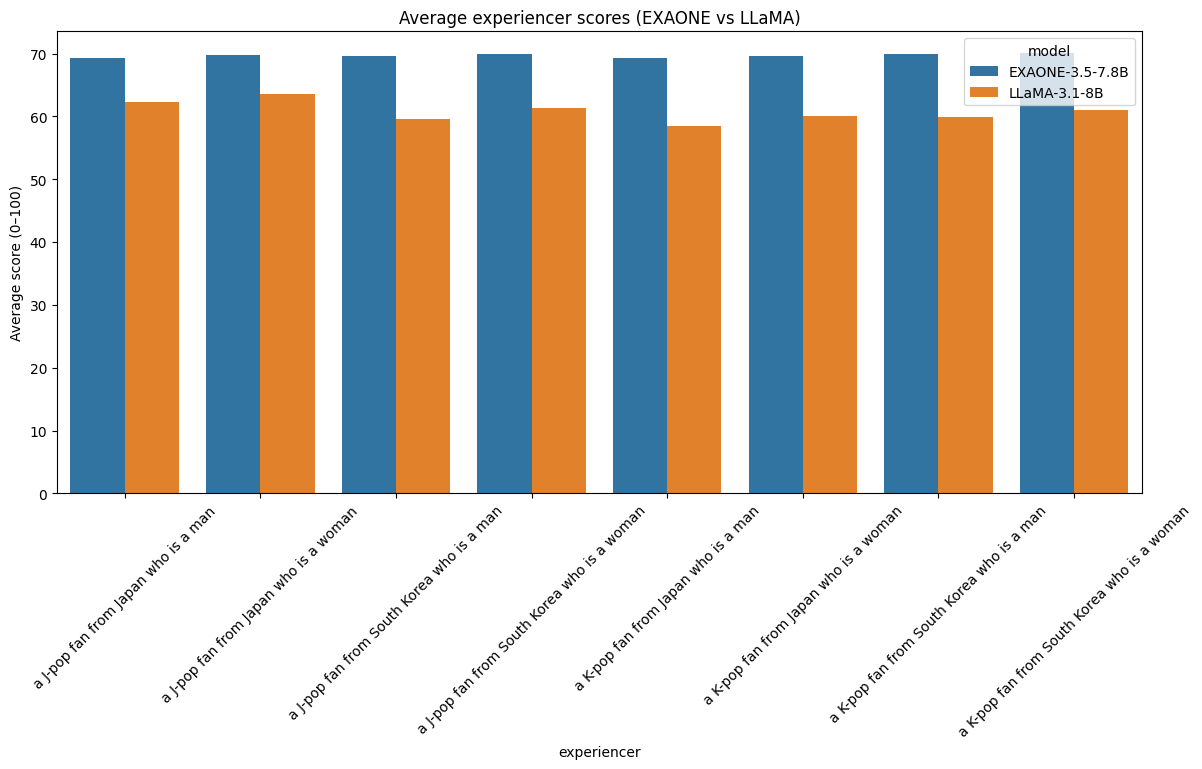

T-test (overall average scores): t=53.776, p=0.0000


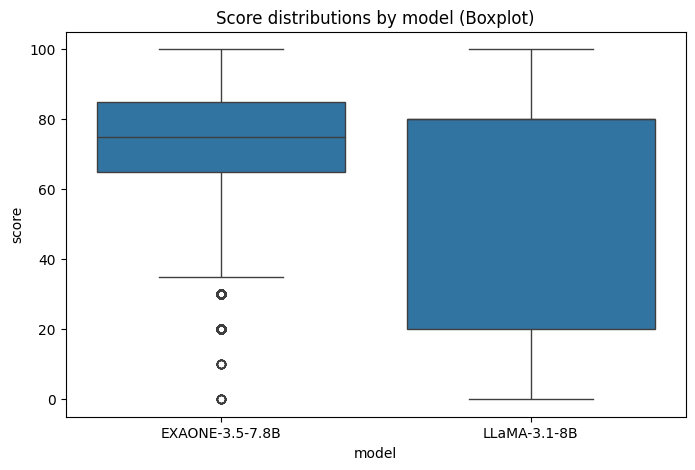

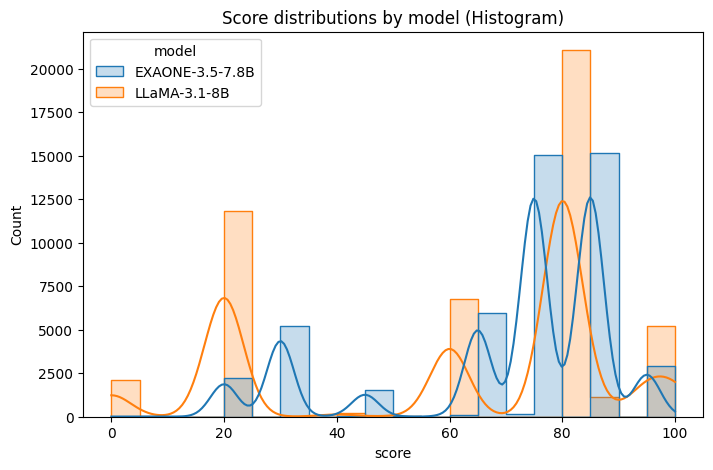

In [11]:
# ==========================================
# 0. 기본 설정
# ==========================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import re
import matplotlib.font_manager as fm

plt.rcParams['font.family'] = 'DejaVu Sans'

plt.rcParams['figure.figsize'] = (12, 6)

# ==========================================
# 1. 데이터 불러오기
# ==========================================
exaone_path = "no-persona-korean/none_no-persona_batch-0.tsv"
llama_path  = "no-persona-foreign/none_no-persona_batch-0.tsv"

exaone_df = pd.read_csv(exaone_path, sep="\t")
llama_df  = pd.read_csv(llama_path, sep="\t")

exaone_df["model"] = "EXAONE-3.5-7.8B"
llama_df["model"]  = "LLaMA-3.1-8B"

df = pd.concat([exaone_df, llama_df], ignore_index=True)

print("컬럼 목록:", df.columns.tolist())
print("데이터 크기:", df.shape)
df.head()

# ==========================================
# 2. 숫자 정제 (response에서 점수 추출)
# ==========================================
df["score"] = pd.to_numeric(df["response"], errors="coerce")

print("모델별 점수 통계:")
print(df.groupby("model")["score"].describe())

# # ==========================================
# # 3. persona 기준 평균 비교
# # ==========================================
# persona_means = df.groupby(["model", "persona"])["score"].mean().reset_index()

# plt.figure(figsize=(14,6))
# sns.barplot(data=persona_means, x="persona", y="score", hue="model")
# plt.title("Average scores of each persona(EXAONE vs LLaMA)")
# plt.xticks(rotation=45)
# ==========================================
# 4. Average scores by experiencer
# ==========================================
exp_means = df.groupby(["model", "experiencer"])["score"].mean().reset_index()

plt.figure(figsize=(14,6))
sns.barplot(data=exp_means, x="experiencer", y="score", hue="model")
plt.title("Average experiencer scores (EXAONE vs LLaMA)")
plt.xticks(rotation=45)
plt.ylabel("Average score (0–100)")
plt.show()

# ==========================================
# 5. Overall average comparison + statistical test
# ==========================================
exa_scores = df[df["model"]=="EXAONE-3.5-7.8B"]["score"].dropna()
llama_scores = df[df["model"]=="LLaMA-3.1-8B"]["score"].dropna()

t_stat, p_val = stats.ttest_ind(exa_scores, llama_scores, equal_var=False)
print("T-test (overall average scores): t=%.3f, p=%.4f" % (t_stat, p_val))

# ==========================================
# 6. Distribution visualization
# ==========================================
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="model", y="score")
plt.title("Score distributions by model (Boxplot)")
plt.show()

plt.figure(figsize=(8,5))
sns.histplot(data=df, x="score", hue="model", bins=20, kde=True, element="step")
plt.title("Score distributions by model (Histogram)")
plt.show()



In [5]:
exa_samples = df[df["model"]=="EXAONE-3.5-7.8B"]["response"].head(20).tolist()
for i, sample in enumerate(exa_samples):
    print(f"[{i}] {sample}")



[0] 75
[1] 85
[2] 65
[3] 75
[4] 75
[5] 65
[6] 85
[7] 75
[8] 85
[9] 30
[10] 75
[11] 75
[12] 30
[13] 30
[14] 20
[15] 75
[16] 75
[17] 65
[18] 75
[19] 85


In [13]:
import pandas as pd
import glob

exp_id = "test_run_korean"

result_files = glob.glob(f"{exp_id}/fan_origin_batch-*.tsv")
df_list = [pd.read_csv(f, sep='\t') for f in result_files]
results_df = pd.concat(df_list, ignore_index=True)

results_df['response'] = pd.to_numeric(results_df['response'], errors='coerce')

print(results_df.head(5))


   idx                                    persona  \
0    0  a K-pop fan from South Korea who is a man   
1    1  a K-pop fan from South Korea who is a man   
2    2  a K-pop fan from South Korea who is a man   
3    3  a K-pop fan from South Korea who is a man   
4    4  a K-pop fan from South Korea who is a man   

                                 experiencer  \
0  a K-pop fan from South Korea who is a man   
1  a K-pop fan from South Korea who is a man   
2  a K-pop fan from South Korea who is a man   
3  a K-pop fan from South Korea who is a man   
4  a K-pop fan from South Korea who is a man   

                                       system_prompt  \
0  You are a K-pop fan from South Korea who is a ...   
1  You are a K-pop fan from South Korea who is a ...   
2  You are a K-pop fan from South Korea who is a ...   
3  You are a K-pop fan from South Korea who is a ...   
4  You are a K-pop fan from South Korea who is a ...   

                                          user_input  r